# Introduction

MNIST data set is a collection of 70,000 handwriting image samples of the numbers 0-9. Our goal is to predict the number each handwritten image represents. Each image is 28x28 grayscale pixels, so we can treat each image as just a 1D array, or tensor, of 784 numbers. MNIST provides 60,000 samples in the training set, and 10,000 samples in the test set. The goal is to use Deep Learning to train a Neural Network to "read" the number represented in a image.

We'll start by importing the data set, like we did for the Tensorflow implementation. Keras is a higher-level API within TensorFlow that makes things a lot easier. Not only is it easier to use, it's easier to tune.

In [2]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

In [3]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

train_images = mnist_train_images.reshape(60000, 784)
test_images = mnist_test_images.reshape(10000, 784)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Normalize images value from [0, 255] to [0, 1]
train_images /= 255
test_images /= 255

Now we'll convert the 0-9 labels into "one-hot" format. Think of one_hot as a binary representation of the label data - that is, which number each handwriting sample was intended to represent. Mathematically one_hot represents a dimension for every possible label value. Every dimension is set to the value 0, except for the "correct" one which is set to 1. For example, the label vector representing the number 1 would be [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] (remember we start counting at 0.) It's just a format that's optimized for how the labels are applied during training.

So the training label data is a tensor of shape [60,000, 10] - 60,000 test images each associated with 10 binary values that indicate whether or not the image represents a given number from 0-9.

In [4]:
train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)

Let's look at a sample image from training data:

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


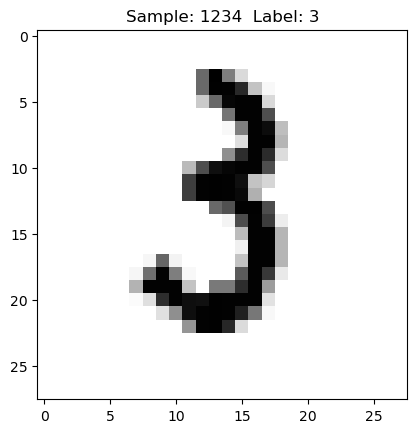

In [5]:
import matplotlib.pyplot as plt

def display_sample(num):
    #Print the one-hot array of this sample's label 
    print(train_labels[num])  
    #Print the label converted back to a number
    label = train_labels[num].argmax(axis=0)
    #Reshape the 768 values to a 28x28 image
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1234)

We will set up layers the same way we did for Tensorflow implementation. The input layer of 784 features feeds into a ReLU (Note: we used sigmoid activation for Tensofrflow) layer of 256 nodes, which feeds into ReLU layer of 256 nodes, which then goes into 10 nodes with softmax applied.

In [6]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(Dense(100, activation='relu', input_shape=(256,)))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Keras let's you get a summary of the model.

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               25700     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 227,670
Trainable params: 227,670
Non-trainable params: 0
_________________________________________________________________


Next we will set up the optimizer and loss function. We will use the RMSProp optimizer here. Some other choices are Adagrad, SGD, Adam, etc.

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

We'll train the model over 10 epochs with a batch size of 100. Keras is slower than Tensorflow (since it performs more computation) so we use fewer epochs here.

In [9]:
history = model.fit(train_images, train_labels,
                    batch_size=100,
                    epochs=10,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 - 2s - loss: 0.2471 - acc: 0.9268 - val_loss: 0.1267 - val_acc: 0.9592
Epoch 2/10
60000/60000 - 2s - loss: 0.0966 - acc: 0.9703 - val_loss: 0.0918 - val_acc: 0.9699
Epoch 3/10
60000/60000 - 2s - loss: 0.0657 - acc: 0.9803 - val_loss: 0.0735 - val_acc: 0.9780
Epoch 4/10
60000/60000 - 2s - loss: 0.0476 - acc: 0.9856 - val_loss: 0.0809 - val_acc: 0.9772
Epoch 5/10
60000/60000 - 2s - loss: 0.0374 - acc: 0.9886 - val_loss: 0.0754 - val_acc: 0.9786
Epoch 6/10
60000/60000 - 2s - loss: 0.0283 - acc: 0.9906 - val_loss: 0.0887 - val_acc: 0.9777
Epoch 7/10
60000/60000 - 2s - loss: 0.0234 - acc: 0.9929 - val_loss: 0.0704 - val_acc: 0.9815
Epoch 8/10
60000/60000 - 2s - loss: 0.0177 - acc: 0.9942 - val_loss: 0.0868 - val_acc: 0.9787
Epoch 9/10
60000/60000 - 2s - loss: 0.0152 - acc: 0.9953 - val_loss: 0.0746 - val_acc: 0.9812
Epoch 10/10
60000/60000 - 2s - loss: 0.0124 - acc: 0.9960 - val_loss: 0.0830 - val_acc: 0.9814


With just 10 epochs, we have a much better accuracy than the Tensorflow version!

In [10]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08297156737679534
Test accuracy: 0.9814


Again, we'll visualize that were incorrectly labeled.

In [ ]:
for x in range(300):
    test_image = test_images[x,:].reshape(1,784)
    predicted_cat = model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()

### Remarks:

We could further improve the performance of the model by selecting the optimal hyperparameters such as number of hidden layers in the neural network, number of units within the hidden layers, learning rate, epochs or even a different optimizer.

We can see that for the same architecture of the neural network, Keras implementation has a better accuracy. This is likely due to the fact that we used a different optimizer (RMSProp v/s SGD) as well as different activation function (ReLU v/s Sigmoid) in Keras as compared to Tensorflow.